<a href="https://colab.research.google.com/github/tonygk4u/Tradingbeginner/blob/master/showcharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install nsepy
from nsepy import get_history
from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd

In [55]:
symbol="ADANIPORT"
enddate = date.today()
startdate = date.today() - timedelta(days=365)
data = get_history(symbol=symbol, start=startdate, end=enddate)
data.head()



,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-06-11,ADANIPORTS,EQ,380.50,384.00,387.70,380.10,381.00,382.30,384.76,2030226,7.811538e+13,43078,670564,0.3303
2018-06-12,ADANIPORTS,EQ,382.30,384.00,390.75,382.35,389.90,388.90,386.43,1920763,7.422316e+13,52067,918968,0.4784
2018-06-13,ADANIPORTS,EQ,388.90,391.15,392.00,381.60,384.20,382.85,386.50,2529140,9.775154e+13,56976,1257525,0.4972
2018-06-14,ADANIPORTS,EQ,382.85,383.65,383.65,372.05,374.60,374.45,375.85,2398168,9.013444e+13,44522,1277458,0.5327
2018-06-15,ADANIPORTS,EQ,374.45,369.80,375.90,369.80,371.65,372.95,372.97,7278768,2.714796e+14,83628,5820106,0.7996


<BarContainer object of 245 artists>

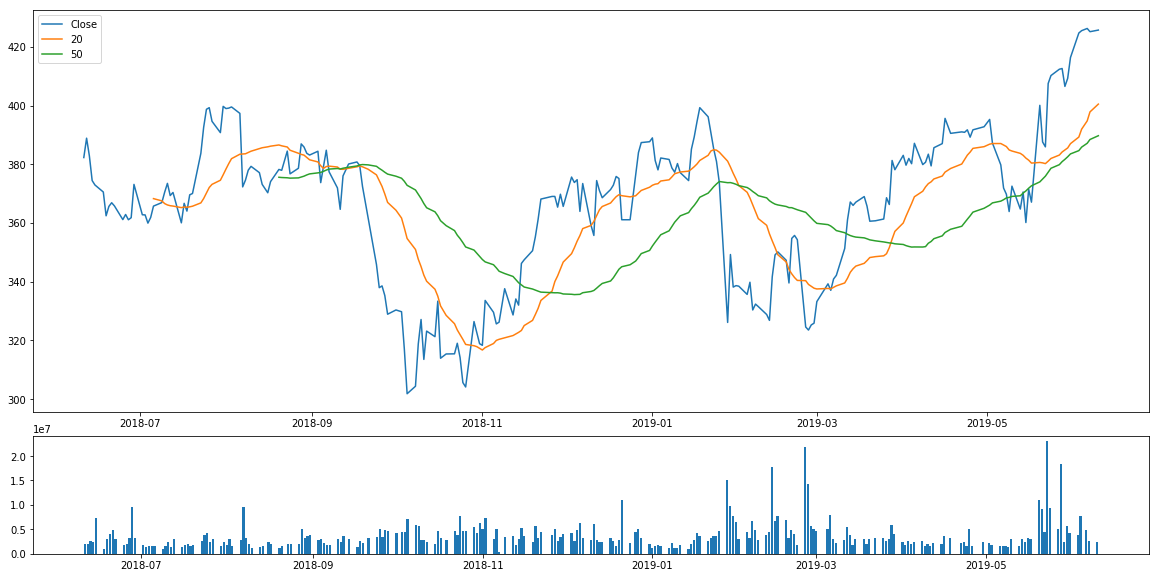

In [89]:
#SMA + Volume!!
data_close = get_history(symbol=symbol, start=startdate, end=enddate)
data_close.drop(data_close.columns.difference(['Close',]), 1, inplace=True)
# calculate Simple Moving Average with 20 days window
sma20 = data_close.rolling(window=20).mean()
sma50 = data_close.rolling(window=50).mean()


data['20'] = sma20
data['50'] = sma50
#data_close.head()

plt.figure(figsize=(20,10))
plt.title(symbol)
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(data.index, data[['Close','20','50']]) 
top.legend(('Close','20','50'))
bottom.bar(data.index, data['Volume'])


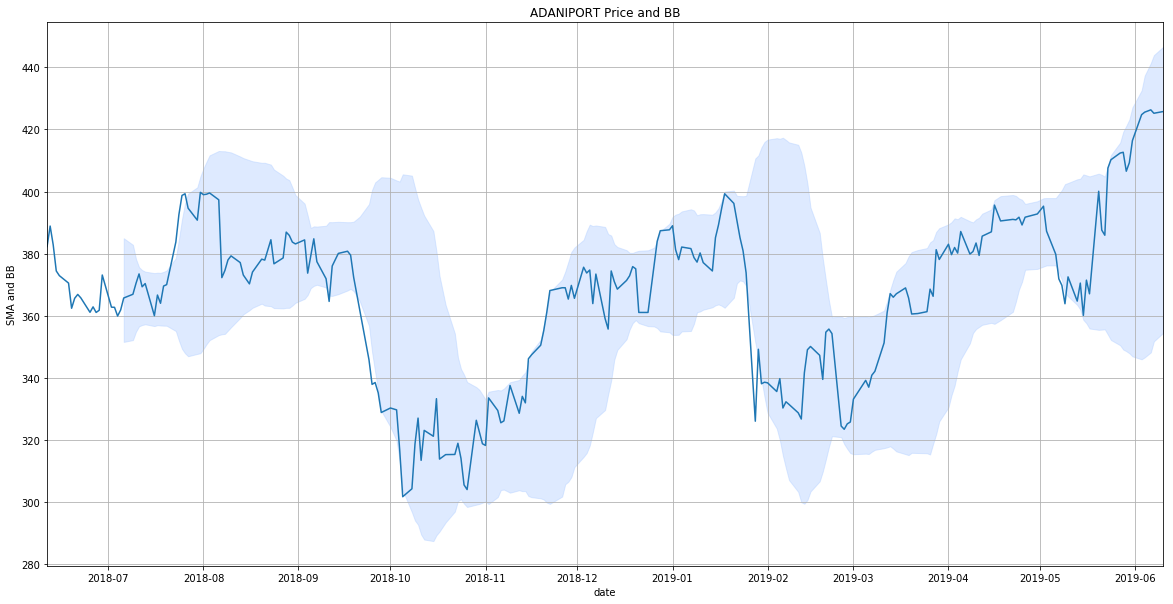

In [96]:
#Bollinger band!!
rstd = data_close.rolling(window=20).std()

upper_band = sma + 2 * rstd
upper_band  = upper_band.rename(columns={'Close': 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={'Close': 'lower'})

data['upper_band'] = upper_band
data['lower_band'] = lower_band

plt.figure(figsize=(20,10))
ax = data['Close'].plot(title='{} Price and BB'.format(symbol))
ax.fill_between(data.index, data['lower_band'], data['upper_band'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()
